<a href="https://colab.research.google.com/github/lanashin/Data_Viz/blob/main/hw3_dataviz__Lana_Shindler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



In this assignment, you are will work with the San Francisco repository (https://datasf.org/) similar to NYC Open Data. 

Download the CSV file with the data set regarding Monthly Property Crime 2005 to 2015 (792 records with 3 attributes): https://data.sfgov.org/Public-Safety/Monthly-Property-Crime-2005-to-2015/k5vw-3yuz

Use any Python visualization library. Explore the SF Monthly Property Crime Data using any two (different!!) visualization techniques (each visualization is worth 10 points):

*	Line charts
*	Multi-line charts
*	Bar charts
*	Stacked area charts
*	Stacked bar charts
*	Heatmap
*	Animated bubble charts
*	Any other visualization type. 

For each of the submitted visualization describe the topic/question that you want to research using this visualization and justify the use of a particular visualization technique. 


## Download and read CSV file regarding Monthly Property Crime 2005 to 2015.
### Source: San Francisco repository (https://datasf.org/)
### (https://data.sfgov.org/Public-Safety/Monthly-Property-Crime-2005-to-2015/k5vw-3yuz)


In [29]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np 
import seaborn as sns 
import plotly.express as px
  
# Read the data into a pandas DataFrame.    
df = pd.read_csv("https://raw.githubusercontent.com/lanashin/Data_Viz/main/Monthly_Property_Crime_2005_to_2015.csv")   
df 

,IncidntNum,Category,Date
0,21,ARSON,01/2005
1,696,BURGLARY,01/2005
2,2027,LARCENY/THEFT,01/2005
3,55,STOLEN PROPERTY,01/2005
4,489,VANDALISM,01/2005
...,...,...,...
787,521,BURGLARY,12/2015
788,2932,LARCENY/THEFT,12/2015
789,70,STOLEN PROPERTY,12/2015
790,547,VANDALISM,12/2015


# Visualization Technique number 1: Bar chart (horizontal).

## Question to explore: What is the top category crime in San Francisco between 2005 and 2015 years? 

In [30]:
#to change the column name 
df1 = df.rename(columns={'IncidntNum': 'Total number of crimes'})
df1

,Total number of crimes,Category,Date
0,21,ARSON,01/2005
1,696,BURGLARY,01/2005
2,2027,LARCENY/THEFT,01/2005
3,55,STOLEN PROPERTY,01/2005
4,489,VANDALISM,01/2005
...,...,...,...
787,521,BURGLARY,12/2015
788,2932,LARCENY/THEFT,12/2015
789,70,STOLEN PROPERTY,12/2015
790,547,VANDALISM,12/2015


In [31]:
#to check what is the summary for each category
df1 = df1.groupby('Category').sum().reset_index()
df1

,Category,Total number of crimes
0,ARSON,2609
1,BURGLARY,64618
2,LARCENY/THEFT,325764
3,STOLEN PROPERTY,8146
4,VANDALISM,80853
5,VEHICLE THEFT,79545


<Figure size 1000x2000 with 0 Axes>

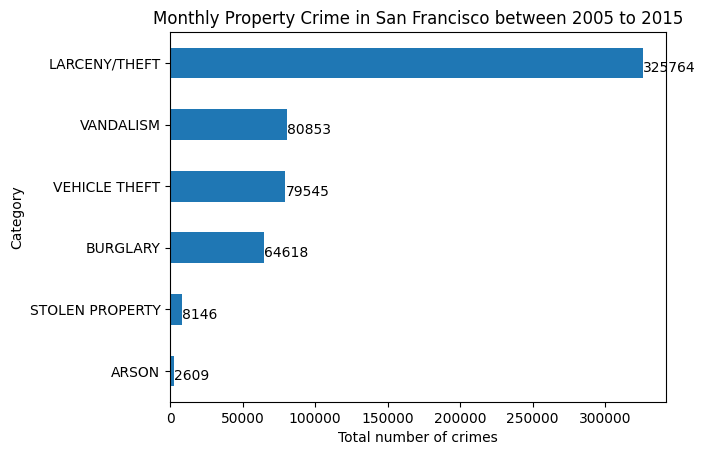

In [63]:
fig = plt.figure(figsize=(10,20)) # define plot area

ax = df1.sort_values('Total number of crimes').plot.barh(x='Category', y='Total number of crimes', legend=None) # remove legend and sort values
ax.set_title('Monthly Property Crime in San Francisco between 2005 to 2015') # Give the plot a main title
ax.set_xlabel('Total number of crimes') # Set text for the x axis
ax.set_ylabel('Category') # Set text for y axis

for i, v in enumerate(df1.sort_values('Total number of crimes')['Total number of crimes']): #to sort values from top to lowest
    ax.text(v +1 , i - 0.15, str(v), color='black', fontsize=10) # adjust position and fontsize of numerical values
    # v + 5 to -5, which will move the text 5 units to the left of the y-axis

plt.show()


Why did i chose to present it with bar charts tecnique?
I wanted to make sure the categories are presented clearly for each column, and also be able to organize it by order from top crime to lowest crimes depends on total summary of crimes for each category between 2005-2015 years. 

# Visualization Technique number 2: Line plot (multi and single line techniques).

What is the category with the most most changing data during the years?

And exploring it deeper with changing by years. 

In [33]:
df

,IncidntNum,Category,Date
0,21,ARSON,01/2005
1,696,BURGLARY,01/2005
2,2027,LARCENY/THEFT,01/2005
3,55,STOLEN PROPERTY,01/2005
4,489,VANDALISM,01/2005
...,...,...,...
787,521,BURGLARY,12/2015
788,2932,LARCENY/THEFT,12/2015
789,70,STOLEN PROPERTY,12/2015
790,547,VANDALISM,12/2015


In [34]:
#what kind of data type is date, shown as object and to get specific year i need to create date data type
df.dtypes

IncidntNum     int64
Category      object
Date          object
dtype: object

In [35]:
#date is in object i need to chage it to datetime type 
df["Date"] = pd.to_datetime(df['Date'])

In [36]:
# Extracting year from the Date column and creating a new column 'Year'
df['Year'] = df['Date'].dt.year

df

,IncidntNum,Category,Date,Year
0,21,ARSON,2005-01-01,2005
1,696,BURGLARY,2005-01-01,2005
2,2027,LARCENY/THEFT,2005-01-01,2005
3,55,STOLEN PROPERTY,2005-01-01,2005
4,489,VANDALISM,2005-01-01,2005
...,...,...,...,...
787,521,BURGLARY,2015-12-01,2015
788,2932,LARCENY/THEFT,2015-12-01,2015
789,70,STOLEN PROPERTY,2015-12-01,2015
790,547,VANDALISM,2015-12-01,2015


In [37]:
#to change the column name
df2 = df.rename(columns={'IncidntNum': 'Number of crimes'})
df2#to change the value 


,Number of crimes,Category,Date,Year
0,21,ARSON,2005-01-01,2005
1,696,BURGLARY,2005-01-01,2005
2,2027,LARCENY/THEFT,2005-01-01,2005
3,55,STOLEN PROPERTY,2005-01-01,2005
4,489,VANDALISM,2005-01-01,2005
...,...,...,...,...
787,521,BURGLARY,2015-12-01,2015
788,2932,LARCENY/THEFT,2015-12-01,2015
789,70,STOLEN PROPERTY,2015-12-01,2015
790,547,VANDALISM,2015-12-01,2015


In [38]:
# Group the DataFrame by year and crime type, and sum the counts.
df2 = df.groupby(["Year", "Category"]).sum().reset_index()
df2 = df2.rename(columns={'IncidntNum': 'Number of crimes'})
df2

,Year,Category,Number of crimes
0,2005,ARSON,229
1,2005,BURGLARY,7051
2,2005,LARCENY/THEFT,25226
3,2005,STOLEN PROPERTY,528
4,2005,VANDALISM,6963
...,...,...,...
61,2015,BURGLARY,5903
62,2015,LARCENY/THEFT,41980
63,2015,STOLEN PROPERTY,927
64,2015,VANDALISM,7636


In [39]:
df2.dtypes #we have year as integer 

Year                 int64
Category            object
Number of crimes     int64
dtype: object

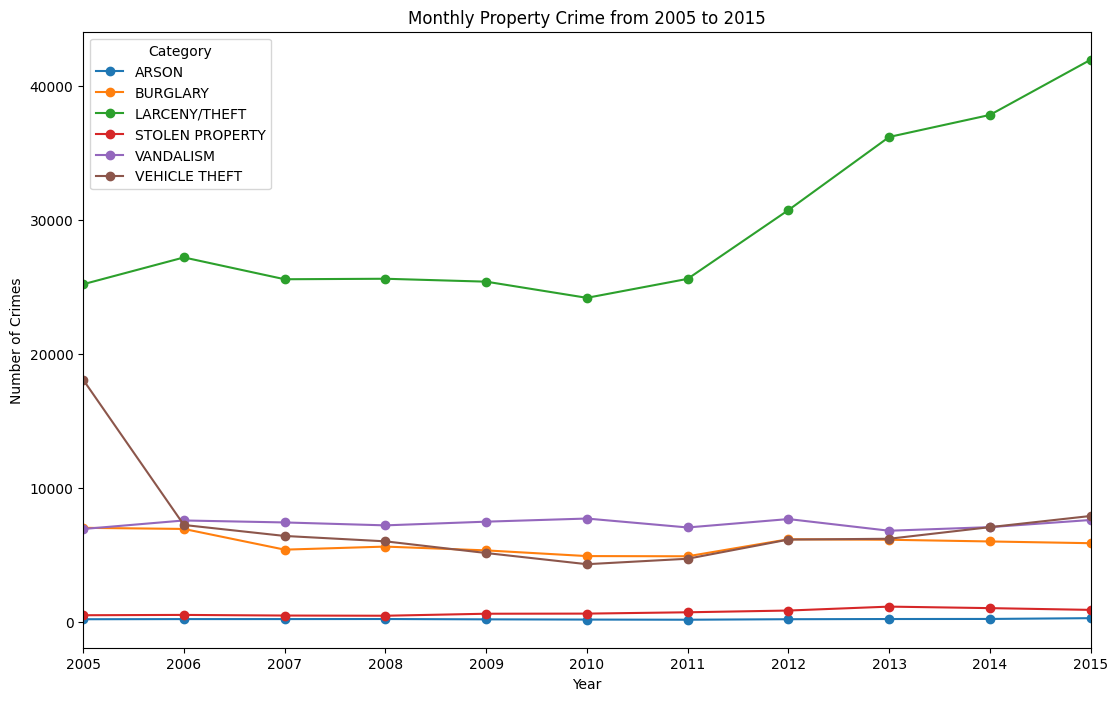

In [40]:

#Pivot the DataFrame to have separate columns for each crime type.
pivoted_df = df2.pivot(index="Year", columns="Category", values="Number of crimes")

# Create the multi-line chart.
fig, ax = plt.subplots(figsize=(13,8))
pivoted_df.plot(kind="line", marker="o", ax=ax, )

plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Monthly Property Crime from 2005 to 2015")
# Set the x-axis limits
ax.set_xlim([2005, 2015])

# Set the x-axis ticks
plt.xticks(range(2005, 2016))

plt.show()

We can see that the most changing category is Larceny/Theft, 
I want to explore it deeper and check the change for this category with numbers for each year
For this chart I'm using single line technique.

In [41]:
#cheching category Larceny/Theft, splitting it by years. 
theft_year = df2.loc[df2['Category'] == 'LARCENY/THEFT']
print(theft_year)

    Year       Category  Number of crimes
2   2005  LARCENY/THEFT             25226
8   2006  LARCENY/THEFT             27227
14  2007  LARCENY/THEFT             25599
20  2008  LARCENY/THEFT             25636
26  2009  LARCENY/THEFT             25419
32  2010  LARCENY/THEFT             24212
38  2011  LARCENY/THEFT             25629
44  2012  LARCENY/THEFT             30760
50  2013  LARCENY/THEFT             36216
56  2014  LARCENY/THEFT             37860
62  2015  LARCENY/THEFT             41980


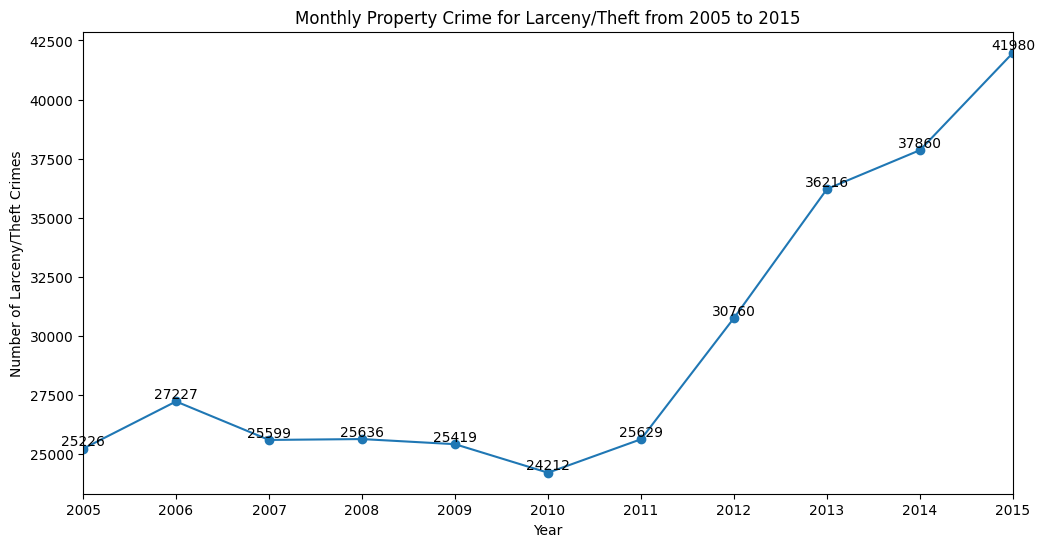

In [42]:
#ploting the chart for this visualization
# Pivot the DataFrame to have separate columns for each crime type.
pivoted_df2 = theft_year.pivot(index="Year", columns="Category", values="Number of crimes")

# Create the multi-line chart.
fig, ax = plt.subplots(figsize=(12,6))
pivoted_df2.plot(kind="line", marker="o", ax=ax, legend= None)

# Add the values of the data points to the chart.
for category in pivoted_df2.columns:
    for year, value in pivoted_df2[category].iteritems():
        ax.annotate(str(value), xy=(year, value), ha='center', va='bottom')

plt.xlabel("Year")
plt.ylabel("Number of Larceny/Theft Crimes")
plt.title("Monthly Property Crime for Larceny/Theft from 2005 to 2015")
# Set the x-axis limits
ax.set_xlim([2005, 2015])

# Set the x-axis ticks
plt.xticks(range(2005, 2016))

plt.show()

The reason why i want to explore this category deeper, creating another chart after multiline chart is because i wanted to see yearly changes. 
The reason why i chose line plot for this presentation is because i wanted to see the continious data during the years. I wanted to see not just the dot with the number, for this presentation was important to see the connection when crime numbers are going up or down, and line plot is great presentation to do it. 